In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from collections import Counter
import pandas as pd
import numpy as np

In [8]:
X, Y = make_blobs(n_samples = 100, n_features=2, centers=3, cluster_std = 2, random_state=17)

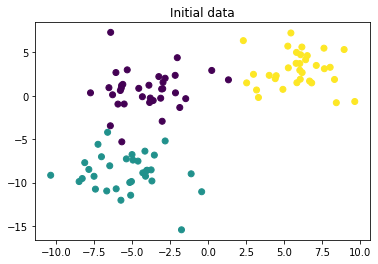

In [9]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.title('Initial data')
plt.show()

In [10]:
#теорема Пифагора на максималках
def evklid_metric(p,q):
    try:
        len(p)
    except TypeError:
        p, q = np.array([p]), np.array([q])
    return np.sum([ ( p[i] - q[i])**2 for i in range(0,len(q)) ])**0.5  

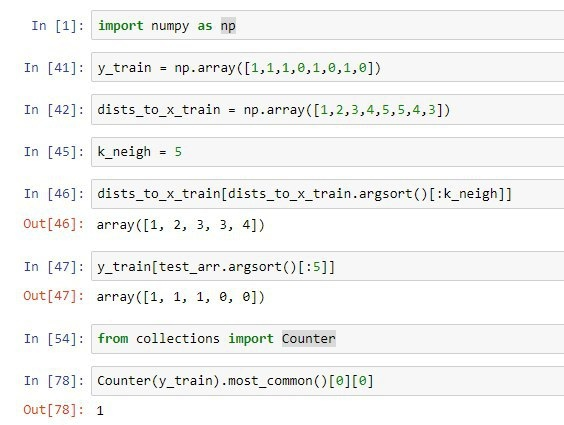

## Классификация

In [6]:
def funct_kNN(x_train, y_train, x_test, k):
    y_test = []
    for p in x_test:
        dists_to_x_train = [[evklid_metric(p,q), y_train[i]] for i, q in enumerate(x_train)]
        top_classes = [e[-1] for e in sorted(dists_to_x_train)[:k]]    
        target = max(top_classes, key = top_classes.count)  
        y_test.append(int(target))    
    return np.array(y_test)

In [12]:
h = 1
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min,x_max,h),
                     np.arange(y_min,y_max,h))

In [13]:
Z = funct_kNN(X,Y,np.vstack((xx.ravel(), yy.ravel())).T,5)

In [14]:
Z = Z.reshape(xx.shape)

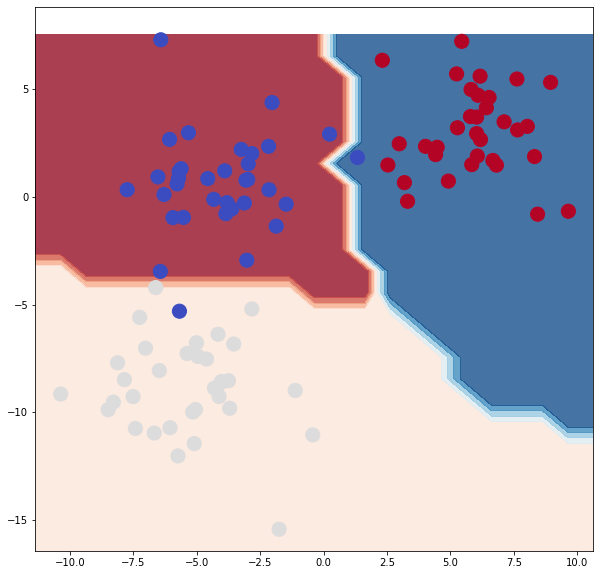

In [15]:
figure = plt.figure(figsize=(10,10))
plt.contourf(xx, yy, Z,  cmap=plt.cm.RdBu, alpha=.8)
plt.scatter(X[:,0], X[:,1], s=200, c = Y, cmap=plt.cm.coolwarm)
plt.show()

## Регрессия

In [21]:
#есть некая зависимость Y(x), которую мы хотим найти (потенциально x может быть многомерным, в зависимости от количества фич)
#в нашем случае это зависимость выражается функцией синуса 
#но мы этой зависимости как-будто не знаем и попытаемся её восстановить по данным
#зададим тренировочный входной вектор с достаточно большим шагом + добавим шум к получившейся зависимости 
#и попытаемся восстановить исходную зависимость с помощью метода ближайших соседей
#ищем расстояния между x_test и x_train, только если в классификации мы выбирали класс, который у большинства ближайших x_train
#то теперь мы просто усредняем их значения
#может сбить с толку, что в классификации у X 2 параметра [x1,x2], а здесь один. Меня почему-то сбило, видно перегрелся :)
#просто там мы работали с двумерным пространсвом, а тут с одномерным
#но моему алгоритму пофигу, он работает в хоть сколько мерном пространстве
def regr_kNN(x_train, y_train, x_test, k):
    y_test = []
    for p in x_test:
        dists_to_x_train = [[evklid_metric(p,q), y_train[i]] for i, q in enumerate(x_train)]
        top_values = [e[-1] for e in sorted(dists_to_x_train)[:k]]    
        target_value = sum(top_values)/len(top_values)      
        y_test.append(target_value)    
    return np.array(y_test)

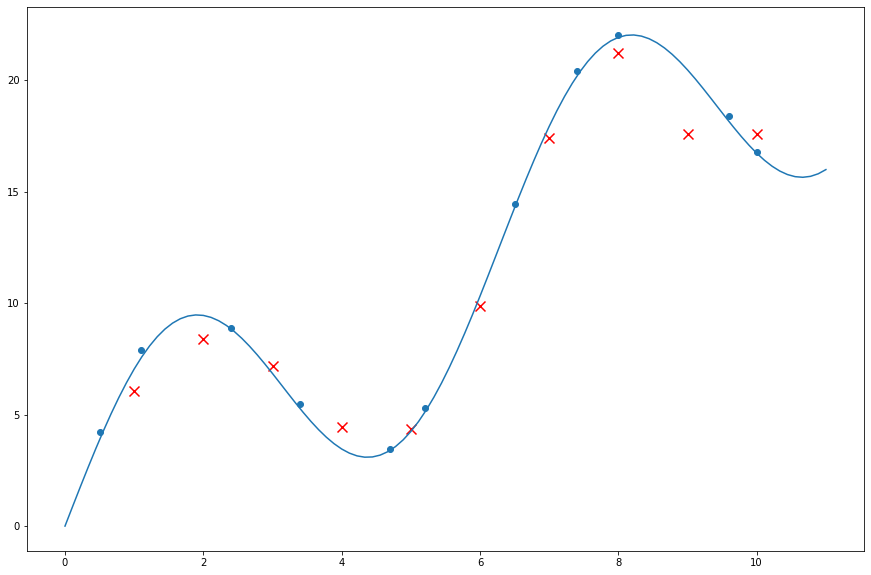

In [22]:
plt.figure(figsize=(15,10))
Sinusnik = lambda x: 6 * np.sin(x) + 2 * x
x_real = np.linspace(0, 11, 100)
y_real = Sinusnik(x_real)
plt.plot(x_real, y_real, label = 'реальная зависимость')

#в реальности любая зависимость выражается с погрешностями и данных часто не хватает для создания идеальной модели
#так что в x_train мало отсчётов, а на выходе ещё добавим шумец
x_train = np.array([0.5, 1.1, 2.4, 3.4, 4.7, 5.2, 6.5, 7.4, 8, 9.6, 10])
y_train = Sinusnik(x_train) + np.random.random_sample(x_train.shape)/2
plt.scatter(x_train, y_train, label = 'зависимость по имеющимся данным')

x_pred = np.arange(1,11)
y_pred = regr_kNN(x_train, y_train, x_pred, 2)
plt.scatter(x_pred, y_pred, s = 100, marker='x', c='r', label = 'восстановленная зависимость')
plt.show()

## Чем меньше расстояние между соседями - тем больше соседей стоит брать для более точной аппроксимации